# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree


## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')

Выделяем два признака (am и pm) как входные данные (матрица признаков X).Целевой столбец (класс), который будем предсказывать, сохраняется в переменную y

In [3]:
X=df[['am', 'pm']].values
y = df['target']

 Обучаем модель логистической регрессии на данных X (признаки) и y (цели).

In [4]:
lr = LogisticRegression(random_state=21, fit_intercept=False)

lr.fit(X=X, y=y)

LogisticRegression(fit_intercept=False, random_state=21)

### Коэффициенты регрессии

 Вычисляем наклон прямой (a) и свободный член (b) в уравнении прямой: 
 *y = ax + b*

In [5]:
a = -lr.coef_[0][0] / lr.coef_[0][1]
b = -lr.intercept_[0] / lr.coef_[0][1]

xx = np.linspace(min(df['am']), max(df['am']))
yy = a * xx + b

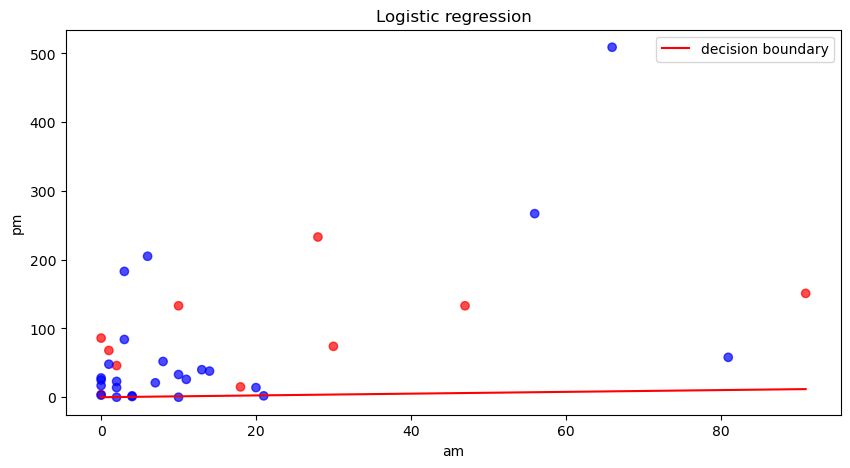

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x = df['am'], 
                   y = df['pm'], 
                   color=['blue' if i == 'working_day' else 'red' for i in df['target']], 
                   alpha=0.7)



ax.plot(xx, yy, label='decision boundary', color='red') # строим линию
ax.set_title('Logistic regression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

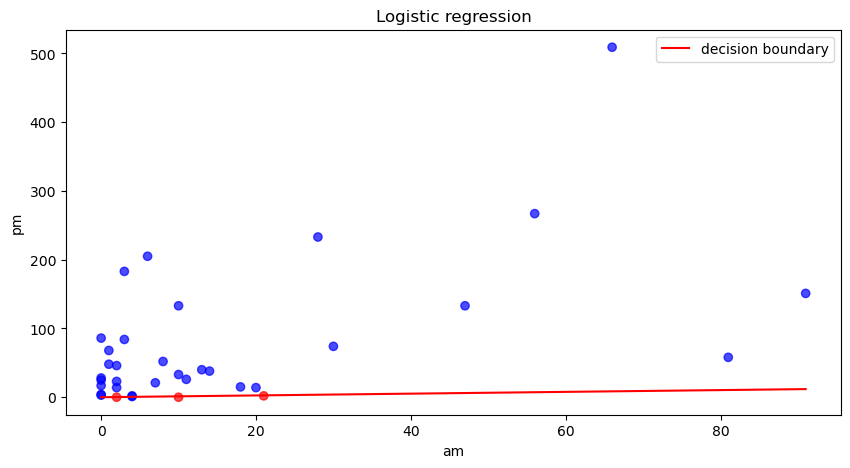

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x = df['am'], 
                   y = df['pm'], 
                   color=['blue' if i == 'working_day' else 'red' for i in df['predict']], 
                   alpha=0.7)



ax.plot(xx, yy, label='decision boundary', color='red')
ax.set_title('Logistic regression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

В машинном обучении StandardScaler (стандартный масштабатор) используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1. 

Формула стандартизации: z = (x−μ) / σ,

где х - значение признака,
 μ - среднее значение признака,
  σ - стандартное отклонение признака
​
 


1. Создам объект StandartScaller

In [8]:
scaler = StandardScaler()

2. Обучаем скейлер на данных (вычисляем 𝜇 и 𝜎) - (fit) и Преобразуем данные (transform):

In [9]:
df_scaler = df.copy()
df_scaler[['am', 'pm']] = scaler.fit_transform(X)


In [10]:
X_scaled = df_scaler[['am', 'pm']].values
y = df_scaler['target']

lr = LogisticRegression(random_state=21, fit_intercept=False)

lr.fit(X=X_scaled, y=y)
pred = lr.predict(X_scaled)
df_scaler['predict'] = pred
df_scaler

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,weekend
9,2020-04-26,0.500501,1.548382,weekend,weekend


In [11]:
a = -lr.coef_[0][0] / lr.coef_[0][1]
b = -lr.intercept_[0] / lr.coef_[0][1]
xx = np.linspace(min(df_scaler['am']), max(df_scaler['am']))
yy = a  * xx + b

Text(0.5, 1.0, 'target')

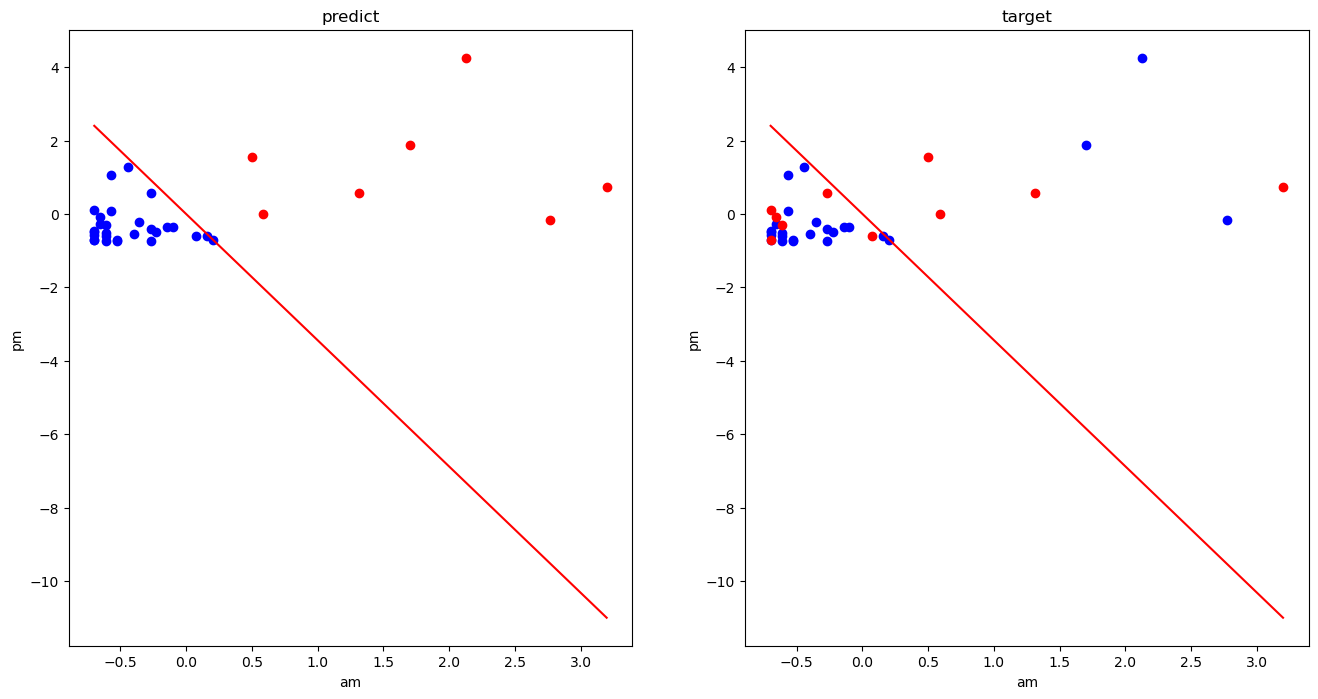

In [12]:

f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))

axes[0].scatter(x=df_scaler[df_scaler['predict'] == 'working_day']['am'],
           y=df_scaler[df_scaler['predict'] == 'working_day']['pm'],
           color='blue', label='working_day')
axes[0].scatter(x=df_scaler[df_scaler['predict'] == 'weekend']['am'],
           y=df_scaler[df_scaler['predict'] == 'weekend']['pm'],
           color='red', label='weekend')


axes[0].plot(xx, yy, label='decision boundary', color='red') # строим линию
axes[0].set_xlabel('am')
axes[0].set_ylabel('pm')
axes[0].set_title('predict')


axes[1].scatter(x=df_scaler[df_scaler['target'] == 'working_day']['am'],
           y=df_scaler[df_scaler['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
axes[1].scatter(x=df_scaler[df_scaler['target'] == 'weekend']['am'],
           y=df_scaler[df_scaler['target'] == 'weekend']['pm'],
           color='red', label='weekend')


axes[1].plot(xx, yy, label='decision boundary', color='red') # строим линию
axes[1].set_xlabel('am')
axes[1].set_ylabel('pm')
axes[1].set_title('target')




In [13]:
accuracy_score(y, pred)

0.7428571428571429

Точность повысилась

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

Метод опорных векторов пытается найти оптимальную разделяющую гиперплоскость между различными классами данных. Эта гиперплоскость максимизирует расстояние между ближайшими точками каждого класса, которые называются опорными векторами. Таким образом, метод опорных векторов пытается найти наилучшее разделение между классами, даже если данные не являются линейно разделимыми.

Основная идея алгоритма заключается в том, чтобы найти гиперплоскость, которая максимально разделяет два класса в пространстве признаков. Это делается с учетом максимизации запаса (или маржи) между ближайшими точками каждого из классов. Эти ближайшие точки называются опорными векторами.

Гиперплоскость — это разделяющая поверхность, которая максимально разделяет данные двух классов. В случае двумерных данных гиперплоскость — это просто линия.
Запас (margin) — это расстояние между гиперплоскостью и ближайшими точками (опорными векторами) каждого из классов.
Алгоритм ищет такую гиперплоскость, которая разделяет два класса с максимальным запасом.

In [14]:
model = SVC(probability=True, random_state=21, kernel='poly')
model.fit(X_scaled, df["target"])

SVC(kernel='poly', probability=True, random_state=21)

In [15]:
# Найдем лучшее ядро с помощью GridSearchCV
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(model, param_grid, scoring='accuracy')
cv.fit(X_scaled, y)
cv.best_params_

{'kernel': 'poly'}

In [16]:
df_svc = df.drop(columns='predict')
df_svc[['am', 'pm']] = scaler.fit_transform(X) 

In [17]:
clf = SVC(kernel='rbf', probability=True, random_state=21)
svc = clf.fit(X_scaled,y)
y_svc = svc.predict(X_scaled)
df_svc['predict_rbf'] = y_svc
accuracy_score(y, y_svc)

0.7428571428571429

In [18]:
clf = SVC(kernel='linear', probability=True, random_state=21)
svc = clf.fit(X_scaled,y)
y_svc = svc.predict(X_scaled)
df_svc['predict_linear'] = y_svc
accuracy_score(y, y_svc)

0.7142857142857143

In [19]:
clf = SVC(kernel='sigmoid', probability=True, random_state=21)
svc = clf.fit(X_scaled,y)
y_svc = svc.predict(X_scaled)
df_svc['predict_sigmoid'] = y_svc
accuracy_score(y, y_svc)

0.6857142857142857

In [20]:
clf = SVC(kernel='poly', probability=True, random_state=21)
svc = clf.fit(X_scaled,y)
y_svc = svc.predict(X_scaled)
df_svc['predict_poly'] = y_svc
accuracy_score(y, y_svc)

0.7428571428571429

In [21]:
x_min, x_max, y_min, y_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
predicts = svc.predict(np.c_[xx.ravel(), yy.ravel()])

In [22]:
label_map = {"working_day": 0, "weekend": 1}
predicts = np.array([label_map[label] for label in predicts])

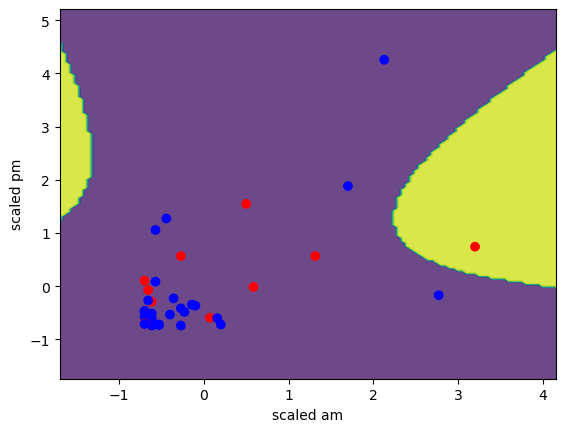

In [23]:
plt.contourf(xx, yy, predicts.reshape(xx.shape), alpha=0.8)
plt.gca().set_xlabel("scaled am")
plt.gca().set_ylabel("scaled pm")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color=['blue' if i == 'working_day' else 'red' for i in df['target']])

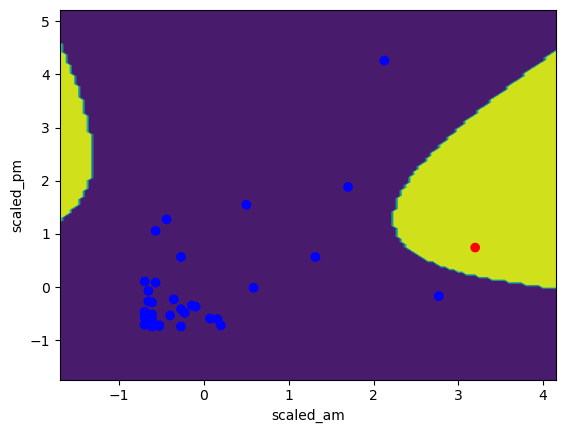

In [24]:

plt.contourf(xx, yy, predicts.reshape(xx.shape))
plt.gca().set_xlabel("scaled_am")
plt.gca().set_ylabel("scaled_pm")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            color=['blue' if i == 'working_day' else 'red' for i in df_svc['predict_poly']])

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [25]:
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [26]:
df_tree = df.drop(columns=['predict'])

In [27]:
model_tree_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
model_tree_4.fit(X_scaled,y)
prediction = model_tree_4.predict(X_scaled)
df_tree['predict'] = prediction
df_tree

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,working_day
1,2020-04-18,1,68,weekend,weekend
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,weekend
9,2020-04-26,28,233,weekend,weekend


In [28]:
print(X_scaled.dtype)  # Должно быть float
print(y.dtype)

float64
object


In [29]:
x_min, x_max, y_min, y_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
predicts = model_tree_4.predict(np.c_[xx.ravel(), yy.ravel()])

In [30]:
label_map = {"working_day": 0, "weekend": 1}
predicts = np.array([label_map[label] for label in predicts])

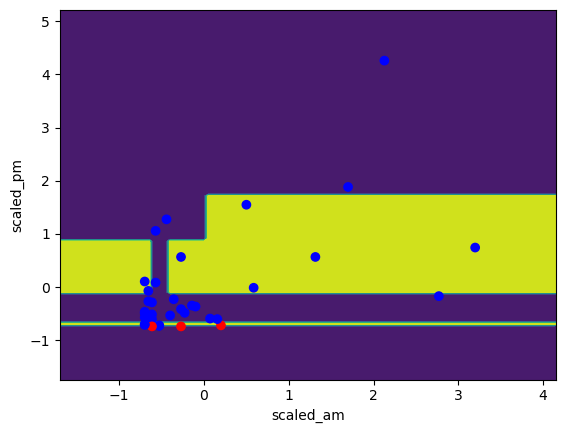

In [31]:

plt.contourf(xx, yy, predicts.reshape(xx.shape))
plt.gca().set_xlabel("scaled_am")
plt.gca().set_ylabel("scaled_pm")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            color=['blue' if i == 'working_day' else 'red' for i in df['predict']])

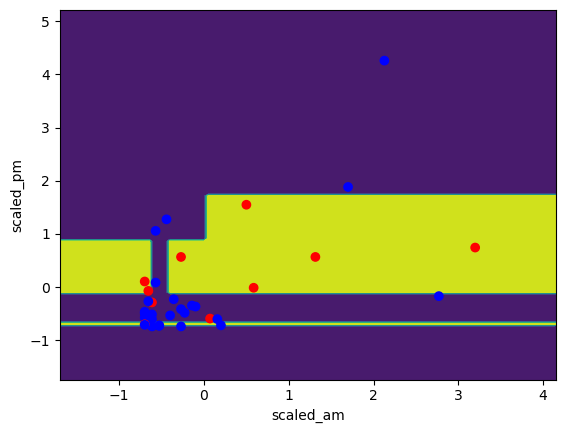

In [32]:

plt.contourf(xx, yy, predicts.reshape(xx.shape))
plt.gca().set_xlabel("scaled_am")
plt.gca().set_ylabel("scaled_pm")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            color=['blue' if i == 'working_day' else 'red' for i in df['target']])

In [33]:
accuracy_score(y, prediction)

0.9428571428571428

In [34]:
model_tree_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
model_tree_1.fit(X_scaled, y)
prediction_1 = model_tree_1.predict(X_scaled)


In [35]:
accuracy_score(y, prediction_1)

0.7714285714285715

In [36]:
model_tree_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model_tree_2.fit(X_scaled, y)
prediction_2 = model_tree_2.predict(X_scaled)
accuracy_score(y, prediction_2)


0.8571428571428571

In [37]:
model_tree_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree_3.fit(X_scaled, y)
prediction_3 = model_tree_3.predict(X_scaled)
accuracy_score(y, prediction_3)

0.8857142857142857

In [38]:
model_tree_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree_5.fit(X_scaled, y)
prediction_5 = model_tree_5.predict(X_scaled)
accuracy_score(y, prediction_5)

0.9714285714285714

In [39]:
param_grid = {'max_depth': np.arange(4, 5)}
gs = GridSearchCV(model_tree_5, param_grid, scoring='accuracy')
gs.fit(X_scaled, y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'max_depth': array([4])}, scoring='accuracy')

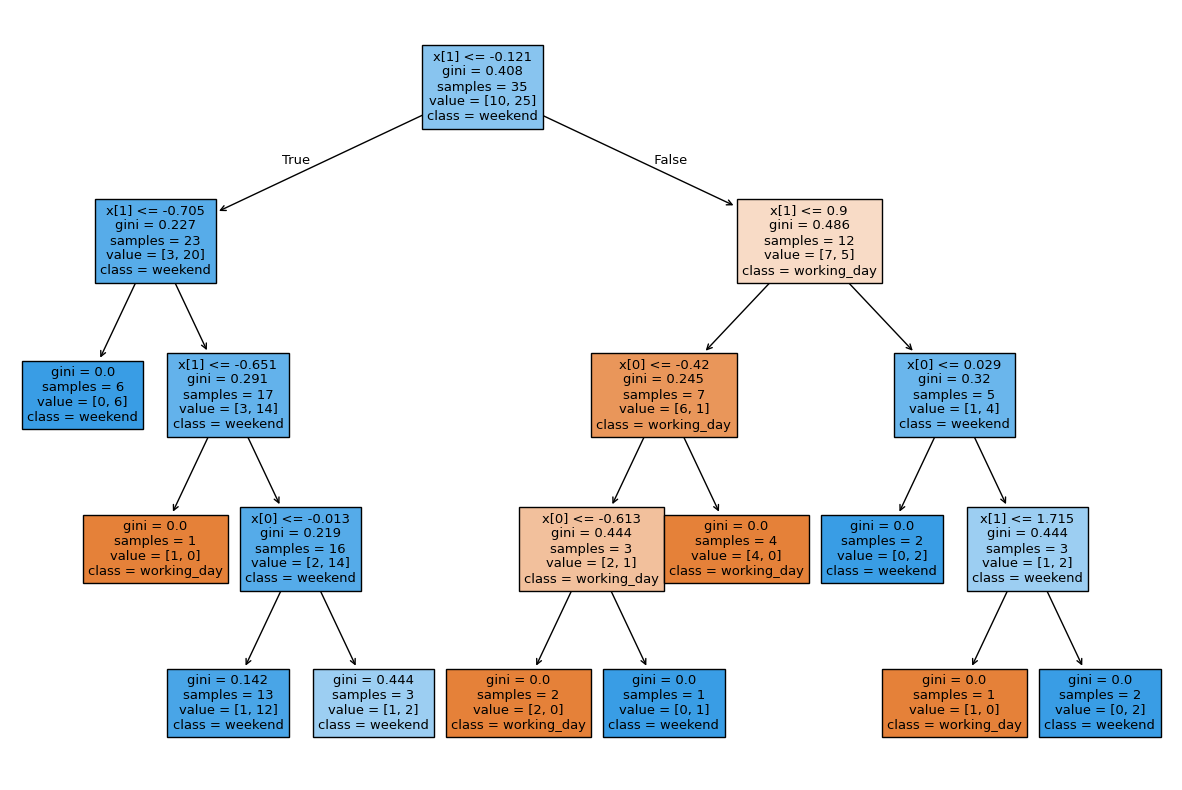

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

plot_tree(gs.best_estimator_,
          class_names=['working_day', 'weekend'],
          filled=True,
          ax=ax)
plt.show()

Ответ: четыре листа определены как рабочие дни